The difference between synchronous and asynchroous activity is - 

Syncronous activity happens on a linear basis - a task is started, it completes, a new task is started.
Asynchronous activitu runs many tasks in parallel.

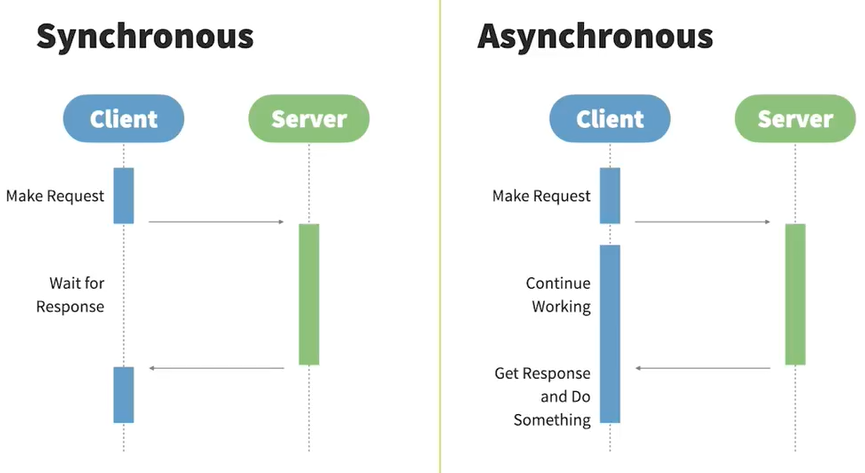

In [19]:
import aiohttp
import asyncio # 
from bs4 import BeautifulSoup
import re
import csv

In [20]:
%pip install nest-asyncio
import nest_asyncio
nest_asyncio.apply()

Note: you may need to restart the kernel to use updated packages.


The below segments are written in a logical reverse order.

The scrape_and_save_links function scrapes links from a URL and writes them to a CSV
The fetch function grabs the URL to hand it to the scrape_and_save_links function
The scrape function iterates through a load of urls, passing each to the fetch function.

These can all run asynchronously to each other.

In [21]:
# define the asynchronous function to scrape a single URL andwrite links to a CSV file

async def scrape_and_save_links(text): # text is the html content of a webpage
    soup = BeautifulSoup(text, 'html.parser') # parse the html content
    file = open("csv_file_of_links", "a", newline="") # open the csv file in append mode
    writer = csv.writer(file, delimiter=',') # create a csv writer object
    for link in soup.find_all("a", attrs = {"href": re.compile("^http")}): # find all the links in the html content
        link = link.get('href') # get the href attribute of the link
        writer.writerow([link]) # write the link to the csv file
        file.close() # close the csv file

In [22]:
#define the asynchronous function to fetch the content of a URL

async def fetch(session, url): 
    try: # handle exceptions
        async with session.get(url) as response: # send a GET request to the URL
            if response.status == 200: # check if the response status is 200 (OK)
                text = await response.text() # get the response text
                task = asyncio.create_task(scrape_and_save_links(text)) # call the scrape_and_save_links function
                await task # wait for the task to complete
            else: # handle non-200 status codes
                print(f"Failed to retrieve {url}: Status code {response.status}") # print an error message
    except Exception as e: # handle exceptions
        print(f"An error occurred while fetching {url}: {e}") # print an error message

In [23]:
# define a main function to scrape multiple URLs

async def scrape(urls): # define the main asynchronous function to scrape multiple URLs
    tasks = [] # create an empty list to store the tasks
    async with aiohttp.ClientSession() as session: # create a session
        for url in urls: # iterate over the list of URLs
            task = asyncio.create_task(fetch(session, url)) # create a task for each URL and calling the fetch function
            tasks.append(task) # add the task to the list
        await asyncio.gather(*tasks) # wait for all tasks to complete


In [27]:
urls = ["https://www.tripadvisor.co.uk/", "https://www.theguardian.com/uk", "https://pds.police.uk/"]
asyncio.run(scrape(urls = urls))

An error occurred while fetching https://www.theguardian.com/uk: I/O operation on closed file.
Failed to retrieve https://www.tripadvisor.co.uk/: Status code 403
An error occurred while fetching https://pds.police.uk/: I/O operation on closed file.
